<a href="https://colab.research.google.com/github/jackamiegbe/Time-Series-Forecasting/blob/main/Stock_Price_Forecasting_with_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting – Stock Price Prediction AAPL**

In this project, I built a stock price forecasting model using Facebook Prophet to predict future stock prices based on historical data. Here’s a breakdown of what I did:
1.	Loaded and Prepared Data:
	•	Collected historical stock price data, including date and closing price.
	•	Preprocessed the data to ensure it was in the correct format for time series forecasting.
2.	Trained the Prophet Model:
	•	Used Facebook Prophet to model trends, seasonality, and holidays, which can affect stock prices.
	•	Trained the model on historical data to capture these components for more accurate predictions.
3.	Evaluated the Forecast:
	•	Generated future predictions based on the model, visualizing the forecasted stock prices along with confidence intervals.
	•	Assessed the model’s performance by comparing predicted values to actual values.
4.	Visualized Results:
	•	Plotted the forecasted stock prices and analyzed trend changes and seasonal patterns over time.

**Step 1: Load the Time Series Dataset**

In [ ]:
!pip install prophet yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

#Download Apple stock data
stock_data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')

stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373964,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687305,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021713,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631348,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818436,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865593,85438400


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2014 non-null   float64
 1   High       2014 non-null   float64
 2   Low        2014 non-null   float64
 3   Close      2014 non-null   float64
 4   Adj Close  2014 non-null   float64
 5   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


**Step 2: Preprocess the Data**

In [ ]:
#Reset index, move date to column
stock_data.reset_index(inplace=True)

#Keep date and closing price, creating a new copy
stock_data = stock_data[['Date', 'Close']].copy()

#Rename columns for Prophet
stock_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

stock_data

,ds,y
0,2015-01-02,27.332500
1,2015-01-05,26.562500
2,2015-01-06,26.565001
3,2015-01-07,26.937500
4,2015-01-08,27.972500
...,...,...
2009,2022-12-23,131.860001
2010,2022-12-27,130.029999
2011,2022-12-28,126.040001
2012,2022-12-29,129.610001


**Step 3: Build a Time Series Forecasting Model (Using Facebook Prophet)**

In [ ]:
#Initialize Prophet
model = Prophet()

#Fit model to stock data
model.fit(stock_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4vqdnk_c/052gauzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4vqdnk_c/44mdvhwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38275', 'data', 'file=/tmp/tmp4vqdnk_c/052gauzy.json', 'init=/tmp/tmp4vqdnk_c/44mdvhwz.json', 'output', 'file=/tmp/tmp4vqdnk_c/prophet_model9901317r/prophet_model-20241021134753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Step 4: Make Predictions and Visualize the Forecast**

In [ ]:
#Create a DataFrame with future dates for 365 days
future = model.make_future_dataframe(periods=365)

#Make predictions
forecast = model.predict(future)

#Preview forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-02,33.809339,24.212077,43.341108
1,2015-01-05,34.337826,25.008983,43.181440
2,2015-01-06,34.333062,24.839174,44.387921
3,2015-01-07,34.375586,25.167707,43.105444
4,2015-01-08,34.250535,25.171948,42.872936


**Step 5: Visualize the Forecast**

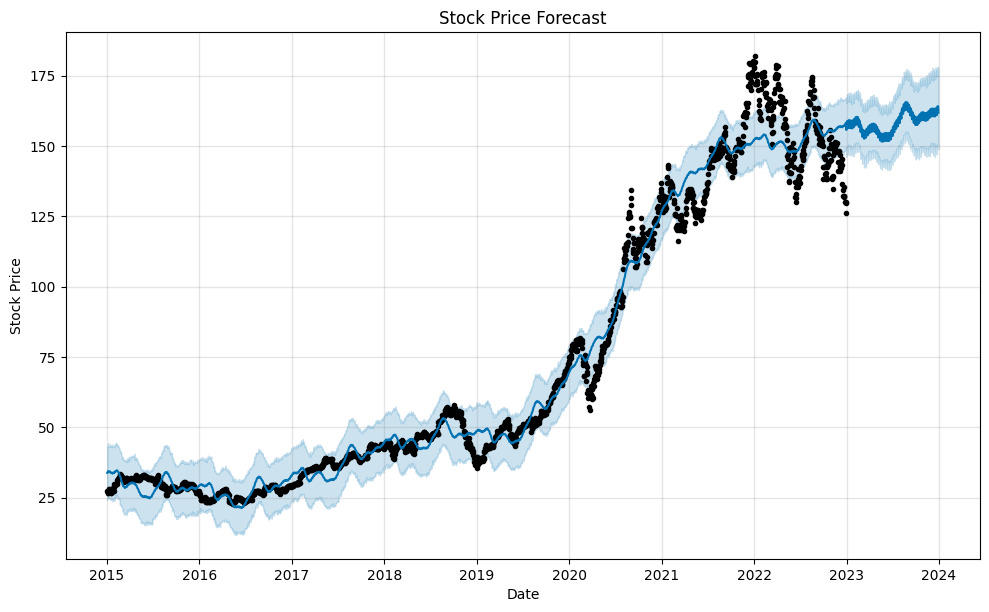

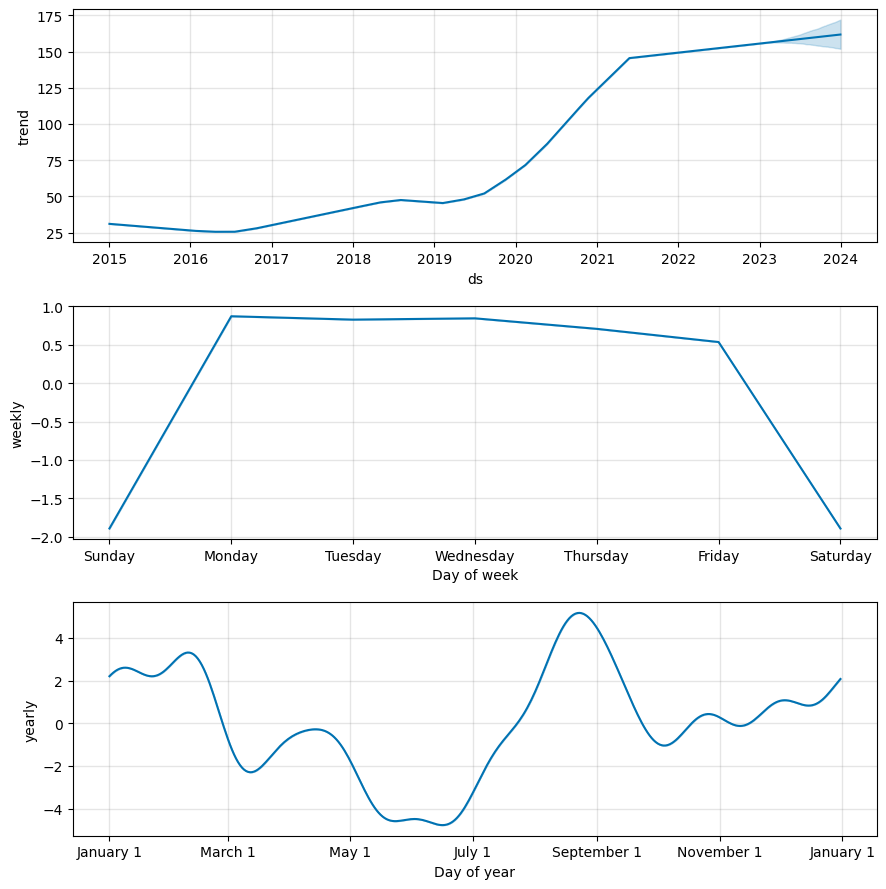

In [ ]:
#Plot forecast
model.plot(forecast)
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

#Plot the forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()

**Step 6: Evaluate the Forecast**

In [ ]:
#Split data into train and test using last 30 days
train = stock_data[:-30]
test = stock_data[-30:]

#Fit the model
model = Prophet()
model.fit(train)

#Create future dates and predict
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

#Compare actual vs predicted
actual_vs_predicted = pd.concat([test.set_index('ds')['y'], forecast.set_index('ds')['yhat'].tail(30)], axis=1)
actual_vs_predicted.columns = ['Actual', 'Predicted']

#Show comparison
print(actual_vs_predicted)

#Calculate MAE
mae = (actual_vs_predicted['Actual'] - actual_vs_predicted['Predicted']).abs().mean()
print(f'MAE: {mae:.2f}')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4vqdnk_c/v36k1mdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4vqdnk_c/s8f8i8jh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81261', 'data', 'file=/tmp/tmp4vqdnk_c/v36k1mdq.json', 'init=/tmp/tmp4vqdnk_c/s8f8i8jh.json', 'output', 'file=/tmp/tmp4vqdnk_c/prophet_model278uii7x/prophet_model-20241021134759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                Actual   Predicted
ds                                
2022-11-17  150.720001  162.338332
2022-11-18  151.289993  162.406562
2022-11-19         NaN  160.366425
2022-11-20         NaN  160.566897
2022-11-21  148.009995  163.204400
2022-11-22  150.179993  163.434546
2022-11-23  151.070007  163.663080
2022-11-24         NaN  163.756358
2022-11-25  148.110001  163.850084
2022-11-26         NaN  161.825131
2022-11-27         NaN  162.030768
2022-11-28  144.220001  164.663940
2022-11-29  141.169998  164.880979
2022-11-30  148.029999  165.088522
2022-12-01  148.309998  165.153956
2022-12-02  147.809998  165.214115
2022-12-03         NaN  163.151062
2022-12-04         NaN  163.315278
2022-12-05  146.630005  165.904896
2022-12-06  142.910004  166.077378
2022-12-07  140.940002  166.240393
2022-12-08  142.649994  166.262228
2022-12-09  142.160004  166.280459
2022-12-10         NaN  164.177710
2022-12-11         NaN  164.304826
2022-12-12  144.490005  166.860094
2022-12-13  145.4700